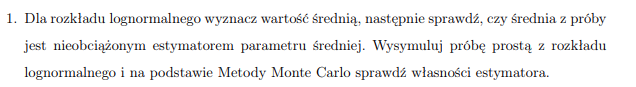

In [4]:
from scipy.stats import norm
import numpy as np
import seaborn as sns

In [69]:
mi = 0
sigma = 1
ns = np.linspace(1000,10000,10)

In [70]:
def lognormal_mean(mi, sigma):
    return np.exp(mi + sigma**2/2)

In [71]:
samples_norm = []
for n in ns:
    sams = []
    for i in range(1000):
        sam = np.random.normal(mi, sigma, int(n))
        sams.append(sam)
    samples_norm.append(sams)

In [72]:
samples_lognorm = []
for sample in samples_norm:
    sams = []
    for sample1 in sample:
        sams.append(np.exp(sample1))
    samples_lognorm.append(sams)


In [73]:
means = []
for sample1 in samples_lognorm:
    means1 = []
    for sample in sample1:
        means1.append(np.mean(sample))
    means.append(means1)
    



In [74]:
xs = np.linspace(1,10,1000)
means_teo = [lognormal_mean(mi, sigma)] * 1000

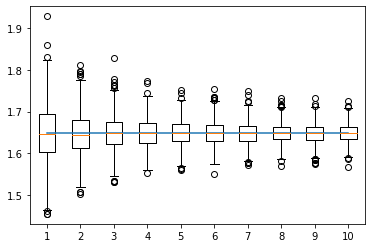

In [75]:
import matplotlib.pyplot as plt
plt.boxplot(means)
plt.plot(xs, means_teo)
plt.show()

In [82]:
vars = []
for mean in means:
    vars.append(np.var(mean))

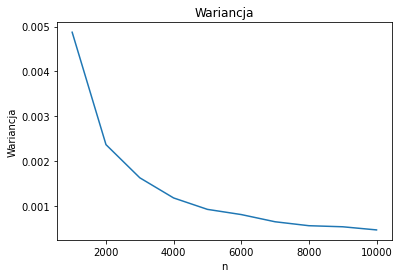

In [84]:
plt.plot(ns,vars)
plt.title("Wariancja")
plt.xlabel("n")
plt.ylabel("Wariancja")
plt.show()

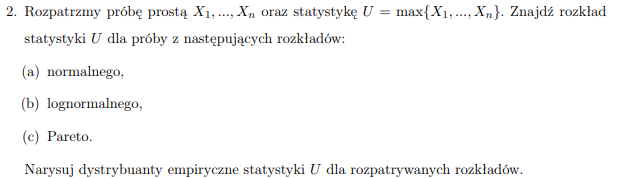

Na bazie rozkładu normalnego

In [86]:
mi2 = 0
sigma2 = 1
n2 = 1000

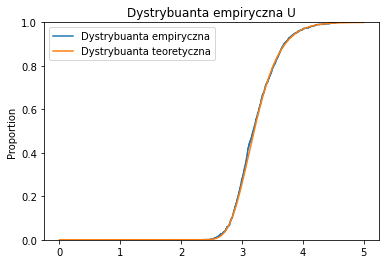

In [106]:
from scipy.stats import norm,lognorm
import matplotlib.pyplot as plt

def u_norm_cdf(x):
    return (norm.cdf(x, mi2, sigma2))**1000

def u_norm_pdf(x):
    return 1000*norm.cdf(x,mi2,sigma2)**999 * norm.pdf(x,mi2, sigma2)

def u_normal(mi, sigma, n):
    samples = [np.random.normal(mi,sigma,1000) for i in range(n)]
    return [max(sample) for sample in samples]

xs = np.linspace(0,5,1000)
u_norm_sample = u_normal(mi2, sigma2, n2)
sns.ecdfplot(data=u_norm_sample, label="Dystrybuanta empiryczna")
plt.plot(xs, u_norm_cdf(xs), label="Dystrybuanta teoretyczna")
plt.legend(loc="best")
plt.title("Dystrybuanta empiryczna U")
plt.show()

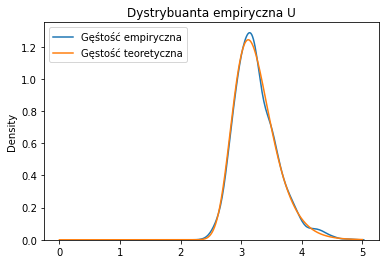

In [102]:

sns.kdeplot(data=u_norm_sample, label="Gęśtość empiryczna")
plt.plot(xs, u_norm_pdf(xs), label="Gęstość teoretyczna")
plt.legend(loc="best")
plt.title("Dystrybuanta empiryczna U")
plt.show()

Na bazie rozkładu lognormalnego

In [104]:

mi3 = 0
sigma3 = 1
n3 = 1000

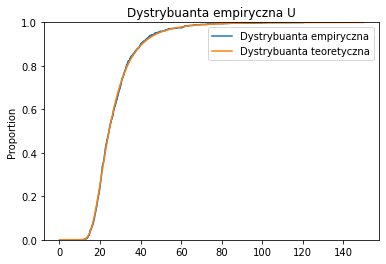

In [111]:
def u_lognormal(mi, sigma, n):
    samples = [np.random.lognormal(mi,sigma,1000) for i in range(n)]
    return [max(sample) for sample in samples]

def u_lognorm_pdf(x):
    return 1000*lognorm.cdf(x,1,mi2,sigma2)**999 * lognorm.pdf(x,1,mi2, sigma2)

def u_lognorm_cdf(x):
    return (lognorm.cdf(x,1, mi2, sigma2))**1000

xs2 = np.linspace(0,150,1000)
u_lognorm_sample = u_lognormal(mi3, sigma3, n3)
sns.ecdfplot(data=u_lognorm_sample, label="Dystrybuanta empiryczna")
plt.plot(xs2, u_lognorm_cdf(xs2), label="Dystrybuanta teoretyczna")
plt.legend(loc="best")
plt.title("Dystrybuanta empiryczna U")
plt.show()

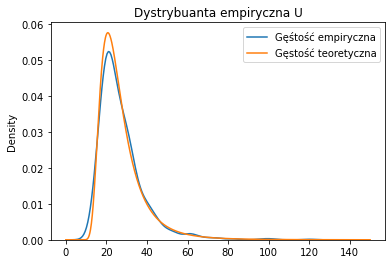

In [113]:
sns.kdeplot(data=u_lognorm_sample, label="Gęśtość empiryczna")
plt.plot(xs2, u_lognorm_pdf(xs2), label="Gęstość teoretyczna")
plt.legend(loc="best")
plt.title("Dystrybuanta empiryczna U")
plt.show()

Na bazie rozkładu Pareto

In [59]:
from scipy.stats import pareto
b = 6
n4 = 1000

In [60]:
def u_pareto(b, n):
    samples = [np.random.pareto(b,1000) for i in range(n)]
    return [max(sample) for sample in samples]
    
def u_pareto_pdf(x):
    return 1000*lognorm.cdf(x,1,mi2,sigma2)**999 * lognorm.pdf(x,1,mi2, sigma2)

def u_lognorm_cdf(x):
    return (lognorm.cdf(x,1, mi2, sigma2))**1000

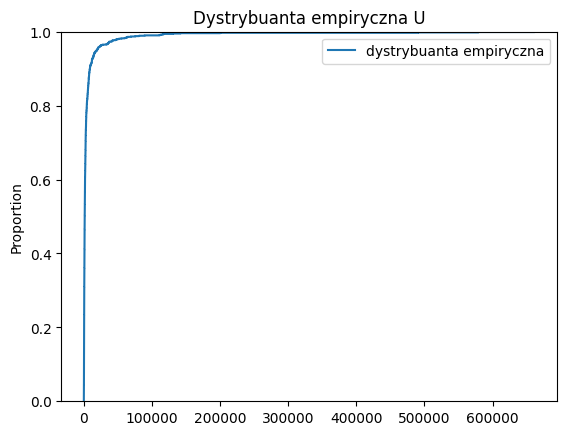

In [61]:
u_pareto_sample = u_pareto(b, n4)
sns.ecdfplot(data=u_pareto_sample, label="dystrybuanta empiryczna")
plt.legend(loc="best")
plt.title("Dystrybuanta empiryczna U")
plt.show()